In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="BDCK1eDEowfgGG4scISW")
project = rf.workspace("putri-mawaring-wening-lwwcx").project("traffic-sign-in-indonesia-detection")
version = project.version(3)

dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Sign-in-Indonesia-Detection-3 in yolov5pytorch:: 100%|██████████| 22326/22326 [00:07<00:00, 3079.84it/s]


In [ ]:
fixed_yaml = """
names:
- Balai Pertolongan Pertama
- Banyak Anak-Anak
- Dilarang Belok Kanan
- Dilarang Berhenti
- Dilarang Berjalan Terus
- Dilarang Masuk
- Dilarang Mendahului
- Dilarang Parkir
- Dilarang Putar Balik
- Gereja
- Hati-Hati
- Jalur Penyebrangan
- Lampu Lalu Lintas
- Larangan Kecepatan - 30km-jam
- Larangan Kecepatan - 40km-jam
- Larangan Kendaraan MST - 10 Ton
- Masjid
- Pemberhentian Bus
- Perintah Ikuti Bundaran
- Perintah Jalur Sepeda
- Perintah Lajur Kiri
- Perintah Pilih Satu Jalur
- Persimpangan 3 Prioritas
- Persimpangan 3 Sisi Kanan Prioritas
- Persimpangan 3 Sisi Kiri Prioritas
- Persimpangan Empat
- Putar Balik
- Rumah Sakit
- SPBU
- Tempat Parkir
nc: 30
roboflow:
  license: CC BY 4.0
  project: traffic-sign-in-indonesia-detection
  url: https://universe.roboflow.com/putri-mawaring-wening-lwwcx/traffic-sign-in-indonesia-detection/dataset/3
  version: 3
  workspace: putri-mawaring-wening-lwwcx
train: train/images
val: valid/images
test: test/images
"""

with open("/content/Traffic-Sign-in-Indonesia-Detection-3/data.yaml", "w") as f:
    f.write(fixed_yaml)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # atau model lain

model.train(
    data="/content/Traffic-Sign-in-Indonesia-Detection-3/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 141MB/s] 


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Traffic-Sign-in-Indonesia-Detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]

Overriding model.yaml nc=80 with nc=30

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2127658  ultralytics.nn.modules.head.Detect           [30, [128, 256, 512]]         
Model summary: 129 layers, 11,147,210 parameters, 11,147,194 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 67.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1609.6±885.9 MB/s, size: 92.5 KB)


train: Scanning /content/Traffic-Sign-in-Indonesia-Detection-3/train/labels... 9762 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9762/9762 [00:04<00:00, 2267.30it/s]


train: New cache created: /content/Traffic-Sign-in-Indonesia-Detection-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 825.3±505.2 MB/s, size: 71.9 KB)


val: Scanning /content/Traffic-Sign-in-Indonesia-Detection-3/valid/labels... 929 images, 0 backgrounds, 0 corrupt: 100%|██████████| 929/929 [00:01<00:00, 914.47it/s]

val: New cache created: /content/Traffic-Sign-in-Indonesia-Detection-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000294, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.79G     0.5218      2.863     0.9317          3        640: 100%|██████████| 611/611 [03:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]

                   all        929        965      0.874      0.893      0.937      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       4.6G      0.458     0.8285     0.8977          3        640: 100%|██████████| 611/611 [03:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.00it/s]

                   all        929        965      0.924      0.929      0.965      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.62G     0.4519     0.6537      0.895          2        640: 100%|██████████| 611/611 [03:14<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.03it/s]


                   all        929        965      0.937      0.963      0.978      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.67G     0.4359     0.5673     0.8908          3        640: 100%|██████████| 611/611 [03:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.04it/s]

                   all        929        965      0.963      0.971      0.983      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.71G     0.4143     0.5163     0.8831          1        640: 100%|██████████| 611/611 [03:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.09it/s]

                   all        929        965      0.948      0.965      0.978      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.75G     0.3971     0.4513     0.8717          5        640: 100%|██████████| 611/611 [03:17<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.08it/s]


                   all        929        965      0.962      0.976       0.99      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.77G     0.3849     0.4259      0.871          3        640: 100%|██████████| 611/611 [03:29<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.76it/s]

                   all        929        965      0.984      0.976       0.99      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.82G      0.371     0.3945      0.867          5        640: 100%|██████████| 611/611 [03:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.82it/s]

                   all        929        965      0.978       0.98      0.989      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.86G      0.362     0.3856     0.8655          6        640: 100%|██████████| 611/611 [03:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.77it/s]

                   all        929        965      0.974      0.982       0.99      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.89G     0.3541      0.359     0.8608          7        640: 100%|██████████| 611/611 [03:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.87it/s]


                   all        929        965      0.978      0.984      0.991       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.91G     0.3454     0.3453     0.8556          2        640: 100%|██████████| 611/611 [03:32<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.99it/s]

                   all        929        965      0.982      0.984      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.96G     0.3346     0.3252      0.855          5        640: 100%|██████████| 611/611 [03:31<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.86it/s]

                   all        929        965      0.991      0.982      0.992      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         5G     0.3306     0.3186     0.8511          2        640: 100%|██████████| 611/611 [03:28<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.89it/s]


                   all        929        965      0.987      0.986      0.992      0.974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.04G     0.3197     0.3058     0.8488          3        640: 100%|██████████| 611/611 [03:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.78it/s]

                   all        929        965      0.988      0.983      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.06G     0.3137      0.292     0.8451          6        640: 100%|██████████| 611/611 [03:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.87it/s]

                   all        929        965       0.99      0.985      0.991      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.11G     0.3108     0.2914     0.8458          7        640: 100%|██████████| 611/611 [03:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.84it/s]

                   all        929        965      0.985      0.986       0.99      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.14G     0.3074     0.2782     0.8429          3        640: 100%|██████████| 611/611 [03:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.78it/s]

                   all        929        965      0.985      0.986      0.988      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.18G     0.2992     0.2667     0.8411          1        640: 100%|██████████| 611/611 [03:32<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.93it/s]

                   all        929        965      0.987       0.99      0.991      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.21G     0.2995     0.2563     0.8408          5        640: 100%|██████████| 611/611 [03:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.83it/s]

                   all        929        965      0.991      0.988      0.991      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.26G     0.2921     0.2565      0.839          2        640: 100%|██████████| 611/611 [03:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.81it/s]

                   all        929        965      0.989      0.985      0.992      0.977


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.29G     0.2436     0.1911     0.7945          2        640: 100%|██████████| 611/611 [03:25<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.80it/s]

                   all        929        965      0.989      0.989      0.991      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.33G     0.2339     0.1808      0.791          2        640: 100%|██████████| 611/611 [03:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.82it/s]

                   all        929        965       0.99      0.991      0.992      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.35G      0.231     0.1743     0.7914          2        640: 100%|██████████| 611/611 [03:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.84it/s]

                   all        929        965      0.989      0.993       0.99      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       5.4G      0.226     0.1695     0.7931          2        640: 100%|██████████| 611/611 [03:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.92it/s]

                   all        929        965      0.992      0.994      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.44G     0.2195     0.1629     0.7851          2        640: 100%|██████████| 611/611 [03:24<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.98it/s]

                   all        929        965      0.991      0.993      0.992      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.47G     0.2155     0.1578     0.7838          3        640: 100%|██████████| 611/611 [03:23<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.02it/s]

                   all        929        965      0.989      0.993      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.49G     0.2101      0.154     0.7832          2        640: 100%|██████████| 611/611 [03:25<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.83it/s]


                   all        929        965      0.991      0.993      0.991      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.54G     0.2054     0.1472      0.782          2        640: 100%|██████████| 611/611 [03:25<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.81it/s]

                   all        929        965      0.991      0.993      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.58G     0.2011     0.1432     0.7816          2        640: 100%|██████████| 611/611 [03:24<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.84it/s]

                   all        929        965       0.99      0.994       0.99      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.62G     0.1967      0.141     0.7834          2        640: 100%|██████████| 611/611 [03:24<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10<00:00,  2.83it/s]

                   all        929        965      0.991      0.993      0.991      0.983



30 epochs completed in 1.816 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,194 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.26it/s]


                   all        929        965      0.991      0.993      0.991      0.983
Balai Pertolongan Pertama         39         39      0.998          1      0.995      0.992
      Banyak Anak-Anak         30         30      0.997      0.967      0.982      0.966
  Dilarang Belok Kanan         27         27      0.963          1      0.995      0.974
     Dilarang Berhenti         33         33      0.998          1      0.995      0.995
Dilarang Berjalan Terus         26         26      0.997          1      0.995      0.995
        Dilarang Masuk         26         26      0.997          1      0.995       0.99
   Dilarang Mendahului         30         30      0.984          1      0.995      0.995
       Dilarang Parkir         32         32          1      0.948      0.995      0.995
  Dilarang Putar Balik         27         29      0.993          1      0.995      0.993
                Gereja         30         30      0.997          1      0.995      0.995
             Hati

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c484a5efa10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.0

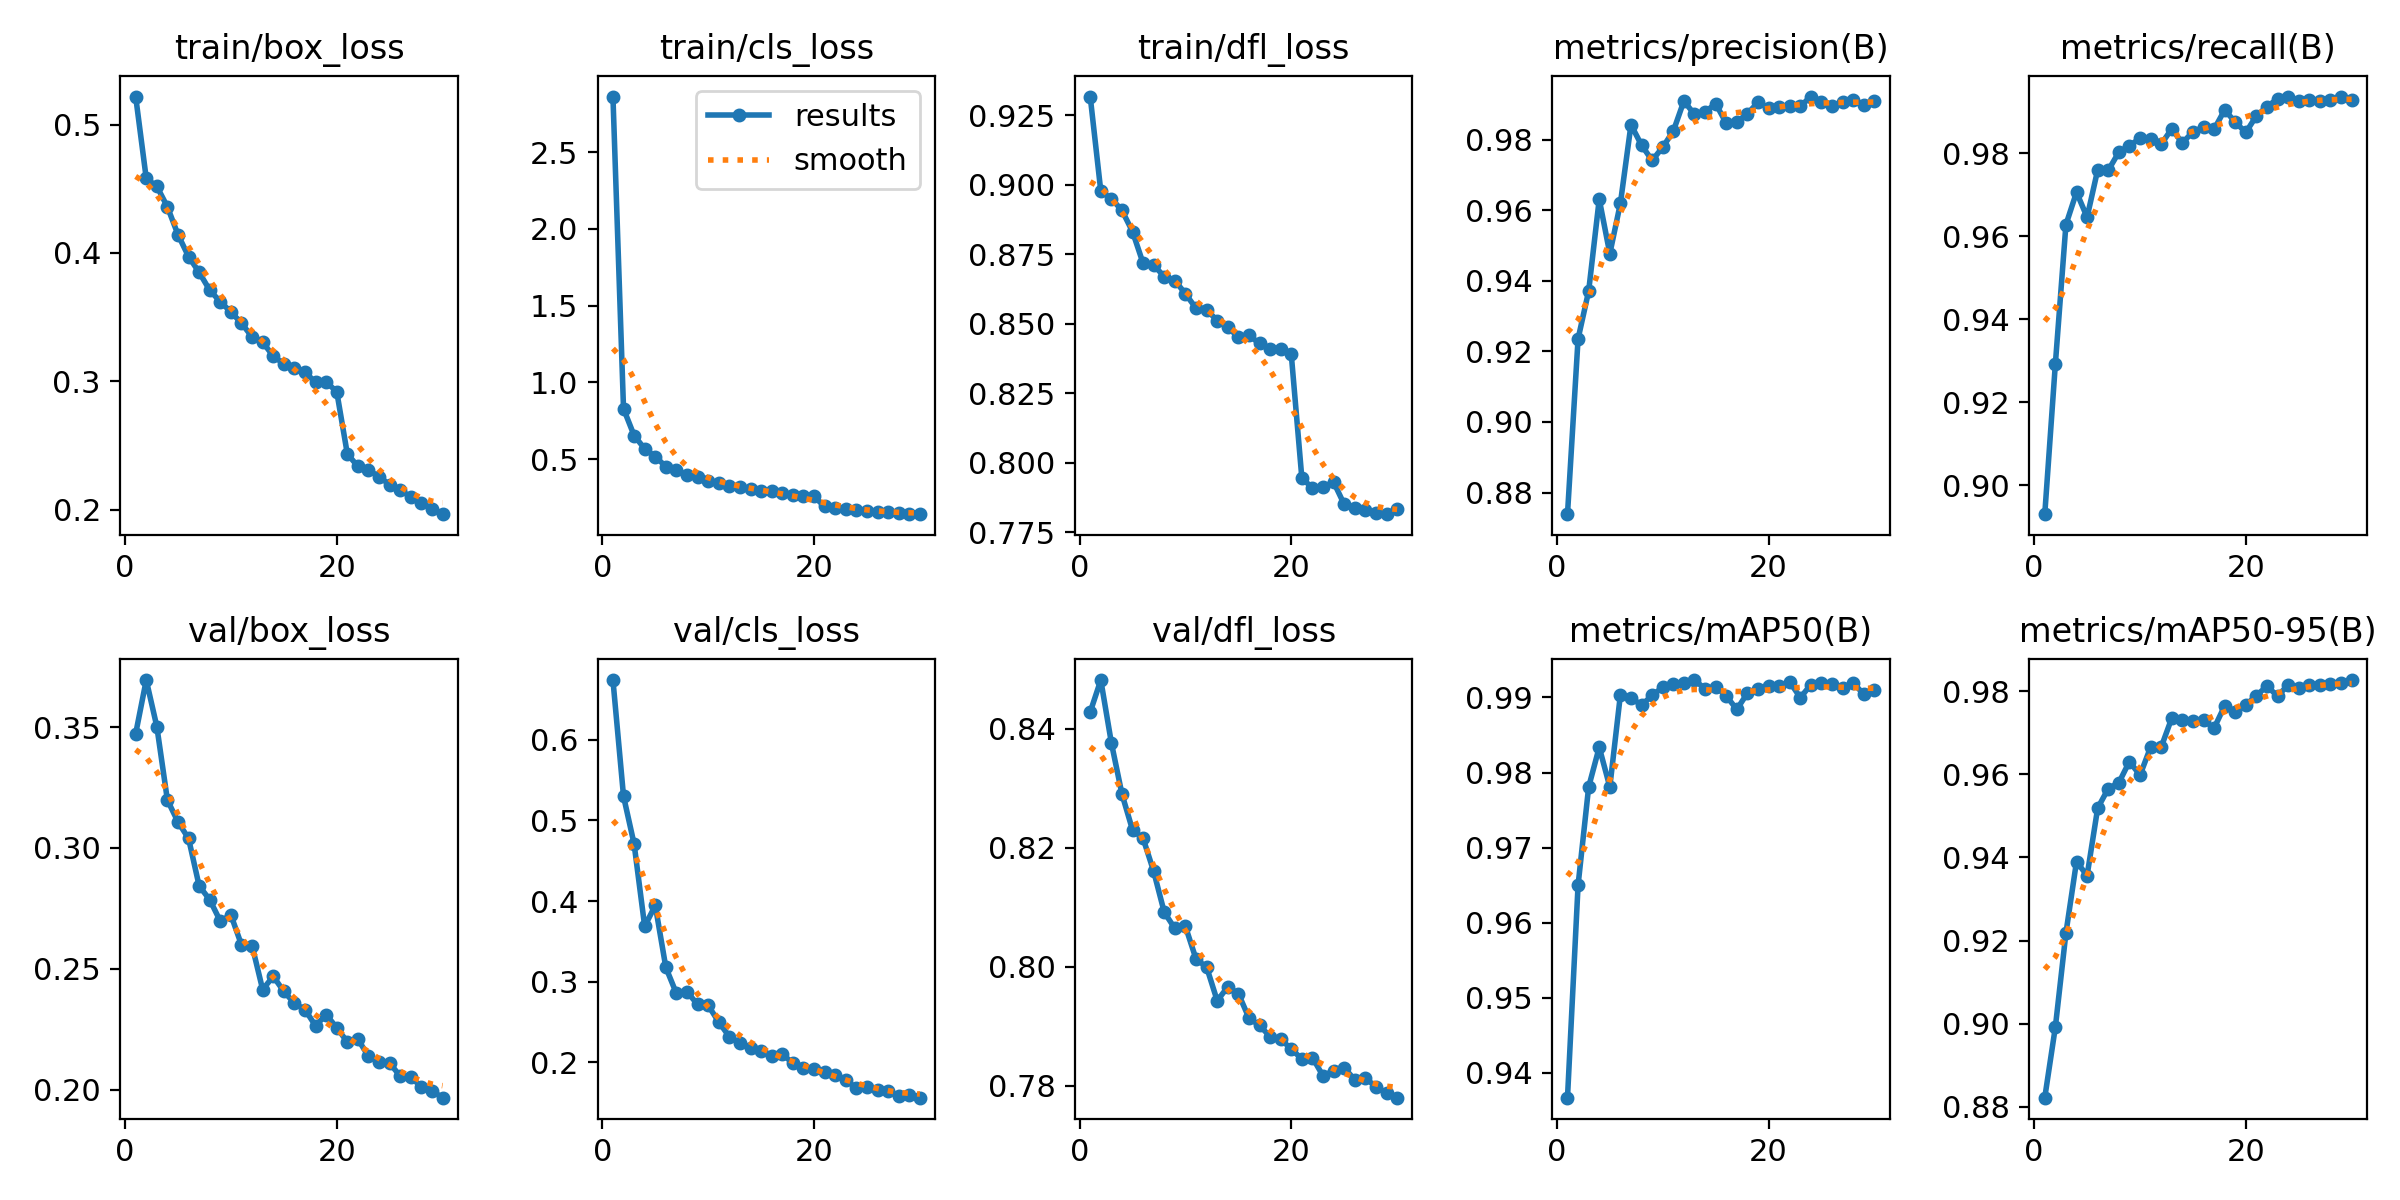

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/results.png', width=800)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving parkir.jpg to parkir.jpg



image 1/1 /content/parkir.jpg: 480x640 1 Dilarang Parkir, 132.9ms
Speed: 6.3ms preprocess, 132.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


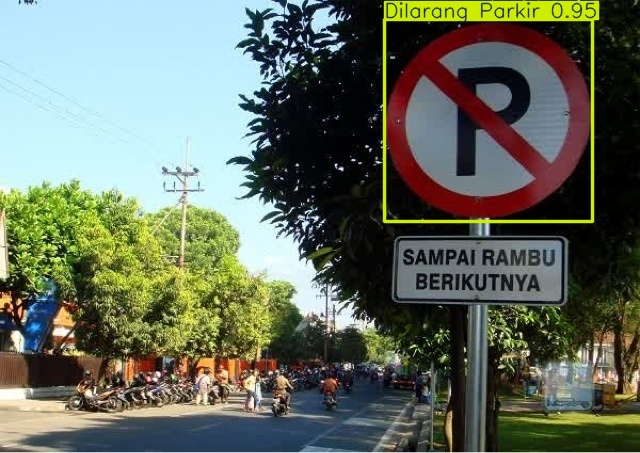

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# 1. Load model hasil training
model = YOLO('/content/runs/detect/train/weights/best.pt')

# 2. Lakukan prediksi pada gambar
results = model('/content/parkir.jpg', save=True)

# 3. Ambil path hasil deteksi
save_dir = results[0].save_dir  # direktori output
predicted_image_path = os.path.join(save_dir, 'parkir.jpg')

# 4. Tampilkan hasil deteksi
display(Image(filename=predicted_image_path))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jalur.jpg to jalur.jpg



image 1/1 /content/jalur.jpg: 448x640 1 Jalur Penyebrangan, 17.1ms
Speed: 4.2ms preprocess, 17.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict6


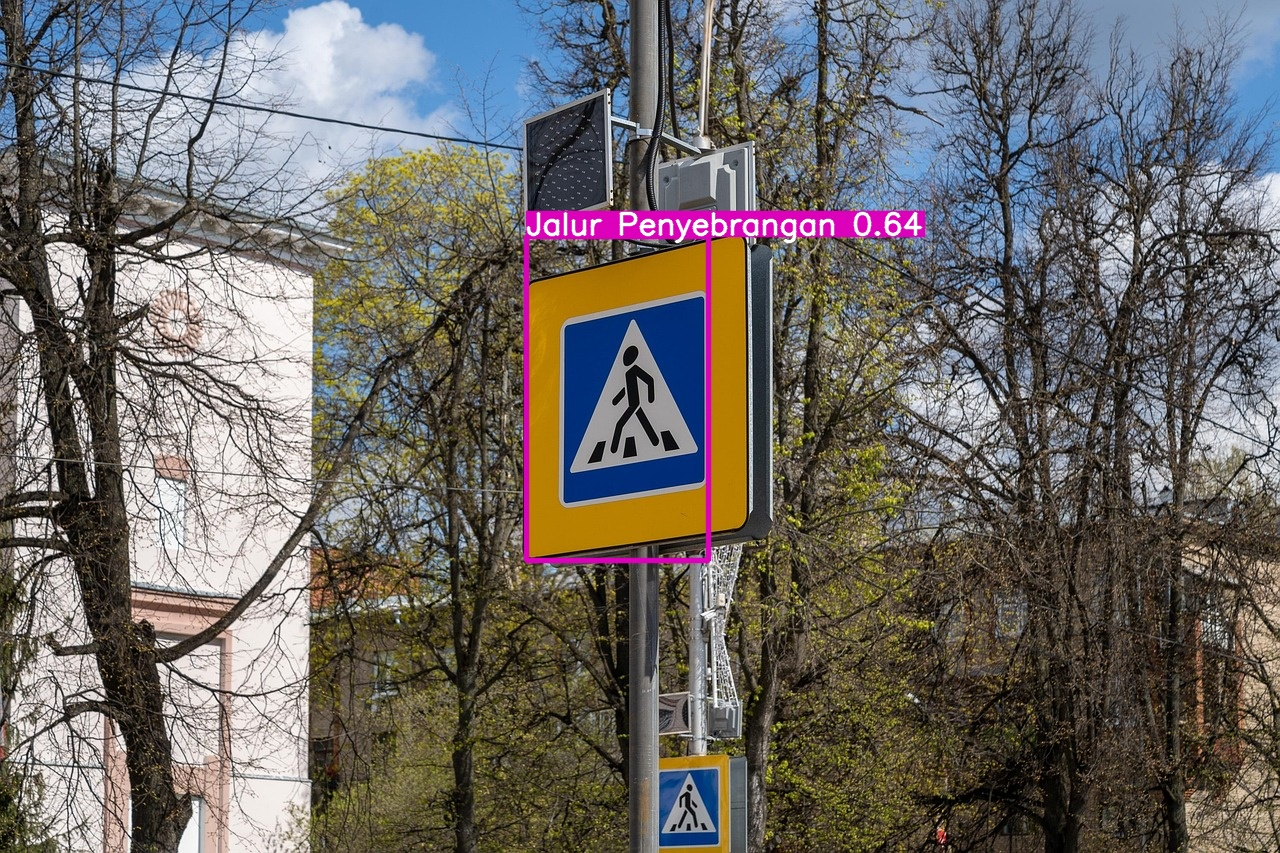

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# 1. Load model hasil training
model = YOLO('/content/runs/detect/train/weights/best.pt')

# 2. Lakukan prediksi pada gambar
results = model('/content/jalur.jpg', save=True)

# 3. Ambil path hasil deteksi
save_dir = results[0].save_dir  # direktori output
predicted_image_path = os.path.join(save_dir, 'jalur.jpg')

# 4. Tampilkan hasil deteksi
display(Image(filename=predicted_image_path))

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
from google.colab import files

# 1. Kompres folder menjadi ZIP
shutil.make_archive('/content/train_results', 'zip', '/content/runs/detect/train')

# 2. Unduh file ZIP
files.download('/content/train_results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>